In [15]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
tf.version.VERSION

'2.3.0'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data(path='mnist.npz')

train_images, test_images = train_images / 255.0, test_images / 255.0

# train_images = train_images / 255
# test_images = test_images / 255

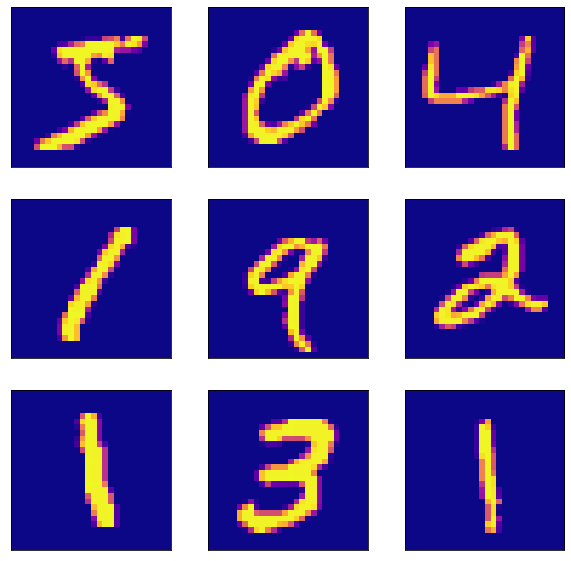

In [6]:
plt.figure(figsize=(10,10)) # Tamaño del cuadrado

for i in range(9):
    
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="plasma") 

plt.show()

In [7]:
train_images , test_images = train_images.reshape((60000, 28, 28, 1)) , test_images.reshape((10000, 28, 28, 1)) 

train_labels , test_labels = to_categorical(train_labels) , to_categorical(test_labels)

In [50]:
model = models.Sequential()

model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 2)         20        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 2)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 4)         76        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,106
Trainable params: 1,106
Non-trainable params: 0
____________________________________________________

In [51]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5231 - accuracy: 0.8372 - val_loss: 0.2272 - val_accuracy: 0.9339
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1948 - accuracy: 0.9410 - val_loss: 0.1579 - val_accuracy: 0.9529
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1518 - accuracy: 0.9532 - val_loss: 0.1257 - val_accuracy: 0.9624
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1300 - accuracy: 0.9602 - val_loss: 0.1156 - val_accuracy: 0.9637
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1182 - accuracy: 0.9639 - val_loss: 0.1094 - val_accuracy: 0.9635
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1101 - accuracy: 0.9661 - val_loss: 0.0954 - val_accuracy: 0.9694
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1043 - accuracy: 0.9682 - val_loss: 0.0897 - val_ac

In [53]:
def remove_transparency(im, bg_colour=(255, 255, 255)):

    if im.mode in ('RGBA', 'LA') or (im.mode == 'P' and 'transparency' in im.info):

        alpha = im.convert('RGBA').split()[-1]

        bg = Image.new("RGBA", im.size, bg_colour + (255,))
        bg.paste(im, mask=alpha)
        return bg

    else:
        return im


In [98]:
from PIL import Image
imagen = "Prueba.png"

img = Image.open(imagen)

if  img.size != (28,28):
    img.thumbnail((28,28), Image.ANTIALIAS)

    entrada = np.array(img, dtype = np.float32)
    entrada = entrada.reshape(1, 768)
    entrada = entrada / 255


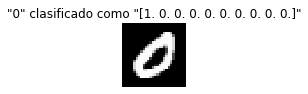

In [99]:
pred = model.predict_classes(test_images)

ids_imgs = np.random.randint(0,test_images.shape[0],9)

for i in range(1):
    
    idx = ids_imgs[i]
    img1 = test_images[idx,:].reshape(28,28)
    a = np.argmax(test_labels[idx,:])
    b = test_labels[idx]
        
    plt.subplot(3,3,i+1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title('"{}" clasificado como "{}"'.format(a,b))
    


In [100]:
pred = model.predict_classes(entrada)
ids_imgs = np.random.randint(0,test_images.shape[0],9)

for i in range(1):
    
    idx = ids_imgs[i]
    img1 = test_images[idx,:].reshape(28,28)
    a = np.argmax(test_labels[idx,:])
    b = test_labels[idx]
        
    plt.subplot(3,3,i+1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title('"{}" clasificado como "{}"'.format(a,b))
    
# ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, None]

# Ese error no me permite correr el codigo con una imagen hecha por uno mismo

ValueError: in user code:

    C:\Users\jaime\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\jaime\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\jaime\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\jaime\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\jaime\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\jaime\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\jaime\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\jaime\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\jaime\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, None]
